<a href="https://colab.research.google.com/github/mephi82/grad_data_analysis/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
x_train = np.array([[1., 1.],
                   [1., 2.],
                   [2., 1.],
                   [3., 2.],
                   [3., 3.],
                   [2., 3.]],
                   dtype=np.float32)

y_train = np.array([[0.],
                   [0.],
                   [0.],
                   [1.],
                   [1.],
                   [1.]],
                   dtype=np.float32)

# Data for test
x_test = np.array([[3., 0.],
                   [4., 1.]],
                   dtype=np.float32)

y_test = np.array([[0.],
                   [1.]],
                   dtype=np.float32)

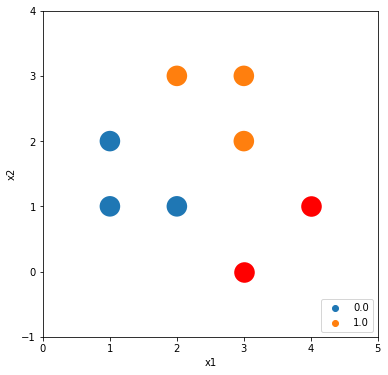

In [ ]:
df = pd.DataFrame(x_train, columns=['x1','x2'])
df['y'] = y_train

df_test = pd.DataFrame(x_test, columns=['x1','x2'])
df_test['y'] = y_test

plt.figure(figsize=(6,6))
sns.scatterplot(x='x1', y='x2', hue='y', data=df, s=500)
sns.scatterplot(x='x1', y='x2', color='red', data=df_test, s=500)
plt.xlim(0, 5)
plt.ylim(-1, 4)
plt.legend(loc='lower right')
plt.show()

In [ ]:
W = tf.Variable(tf.random.normal([2, 1], mean=0.0))
b = tf.Variable(tf.random.normal([1], mean=0.0))

print('# Weights: \n', W.numpy(), '\n\n# Bias: \n', b.numpy())
# Hypothesis and Prediction Function
def predict_prob(X):
    z = tf.matmul(X, W) + b
    hypothesis = 1 / (1 + tf.exp(-z))
    return hypothesis

def predict_z(X):
    z = tf.matmul(X, W) + b
    # hypothesis = 1 / (1 + tf.exp(-z))
    return z

# Weights: 
 [[0.05587511]
 [0.81980103]] 

# Bias: 
 [-0.08012774]


In [ ]:
def plot_predict(x1_space, x2_space, ax, df):
# plt.hold(True)
  x, y = np.meshgrid(x1_space, x2_space)
  mesh = np.vstack((x.reshape(-1),y.reshape(-1) )).T
  meshp = predict_prob(mesh.astype(np.float32))
  meshz = predict_z(mesh.astype(np.float32))
  meshx, meshy, meshp, meshz = (x.reshape(-1), y.reshape(-1), meshp.numpy().reshape(-1), meshz.numpy().reshape(-1))

  ax.plot_trisurf(meshx, meshy, meshp, cmap="inferno", alpha=0.7)
  ax.scatter(df["x1"], df["x2"], df["y"],  # 3D scatter plot
                c='blue', cmap="inferno", s=50)#, alpha=0.5)
  ax.view_init(elev=25.) 

# plot_predict(np.linspace(0,5,10),np.linspace(0,5,10), ax, df)


>>> #0 
 Weights: 
[[0.03486367]
 [0.79671204]] 
 Bias: 
[-0.0993673] 
 cost: 4.490211

>>> #500 
 Weights: 
[[0.81380874]
 [0.8984941 ]] 
 Bias: 
[-3.0457711] 
 cost: 1.8290668

>>> #1000 
 Weights: 
[[1.2527555]
 [1.2656158]] 
 Bias: 
[-4.709511] 
 cost: 1.1997157

>>> #2000 
 Weights: 
[[1.7631031]
 [1.7637805]] 
 Bias: 
[-6.766927] 
 cost: 0.71410394

>>> #4000 
 Weights: 
[[2.3423274]
 [2.3423388]] 
 Bias: 
[-9.109443] 
 cost: 0.3969726



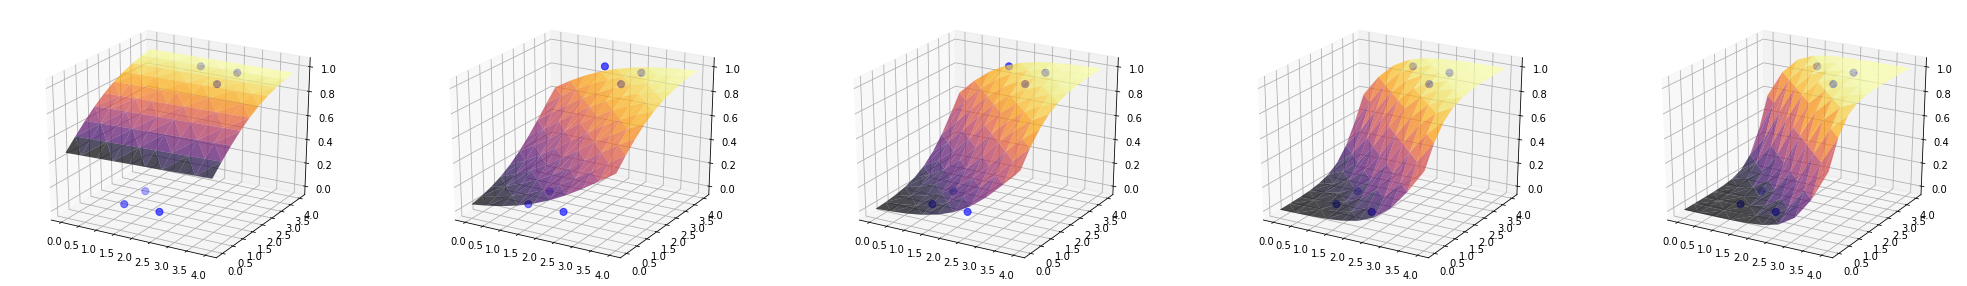

In [ ]:
# Learning Rate
learning_rate = 0.01

fig = plt.figure(figsize=(35,5))
# Training
j = 1
for i in range(4000+1):

  with tf.GradientTape() as tape:

    hypothesis = predict_prob(x_train)
    cost = tf.reduce_mean(-tf.reduce_sum(y_train*tf.math.log(hypothesis) + (1-y_train)*tf.math.log(1-hypothesis)))        
    W_grad, b_grad = tape.gradient(cost, [W, b])

    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)

  if i in [0, 500, 1000, 2000, 4000]:
    ax = fig.add_subplot(1,5,j, projection="3d")
    plot_predict(np.linspace(0,4,10),np.linspace(0,4,10), ax, df)
    print(">>> #%s \n Weights: \n%s \n Bias: \n%s \n cost: %s\n" % (i, W.numpy(), b.numpy(), cost.numpy()))
    j+=1

In [ ]:
## MNIST example
import time
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Turn down for faster convergence

train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)




In [ ]:
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

In [ ]:
t0 = time.time()
clf = LogisticRegression()
clf.fit(X_train, y_train)
run_time = time.time() - t0
print("Example run in %.3f s" % run_time)

Example run in 3.651 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


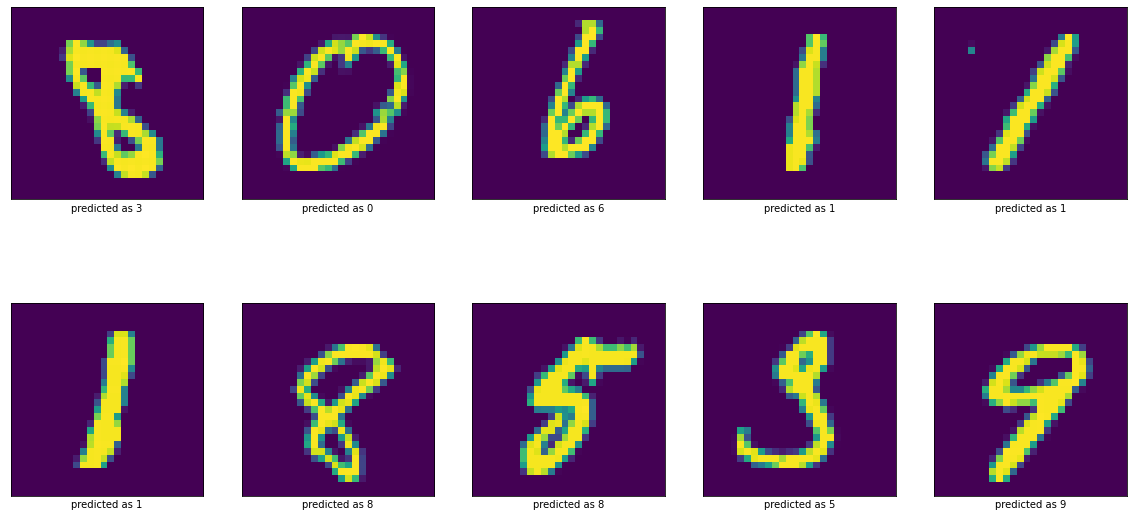

In [ ]:
prediction = clf.predict(X_test)
plt.figure(figsize=(20, 10))
scale = np.abs(coef).max()
for i in range(10):
    plot = plt.subplot(2, 5, i + 1)
    plot.imshow(X_test[i].reshape(28, 28))
    plot.set_xticks(())
    plot.set_yticks(())
    plot.set_xlabel("predicted as %s" % prediction[i])

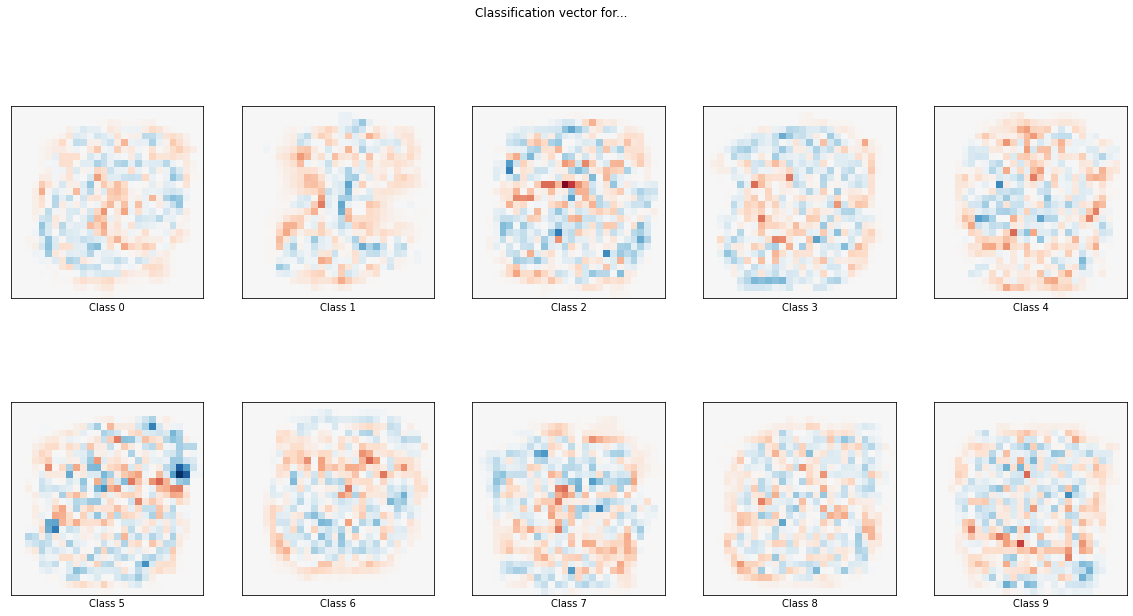

In [ ]:

coef = clf.coef_.copy()
plt.figure(figsize=(20, 10))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")
plt.show()